## Lab 0 - Digital Multimeters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
# load data
df = pd.read_csv('Data/Lab0_DMM.csv')
df

,Analog (V),dAnalog (V),Multimeter (V),dMultimeter (V),fractional uncertainty
0,1.5,0.5,1.76,0.02,0.01
1,2.5,0.5,2.62,0.02,0.01
2,4.0,0.5,4.08,0.04,0.01
3,5.0,0.5,5.01,0.05,0.01
4,6.5,0.5,6.61,0.06,0.01
5,7.5,0.5,7.50,0.07,0.01
6,9.0,0.5,9.09,0.07,0.01
7,10.0,0.5,9.86,0.08,0.01


In [3]:
# extract data
analog_data = df['Analog (V)']
analog_err = df['dAnalog (V)']

dmm_data = df['Multimeter (V)']
dmm_err = df['dMultimeter (V)']

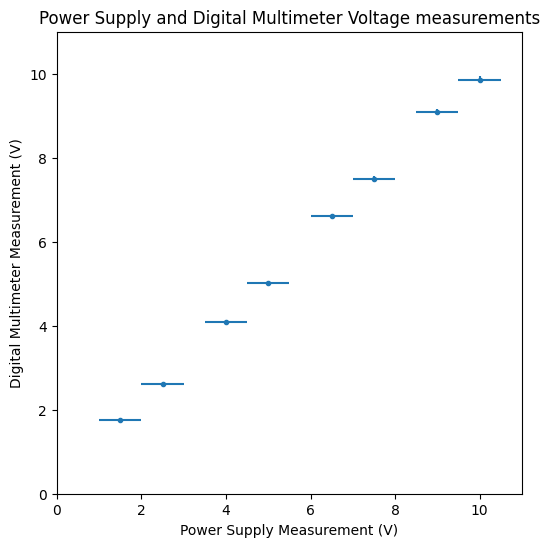

In [13]:
plt.figure(figsize = (6, 6))
plt.errorbar(x = analog_data, xerr = analog_err, y = dmm_data, yerr = dmm_err, marker = '.', linestyle = '')

plt.xlabel('Power Supply Measurement (V)')
plt.ylabel('Digital Multimeter Measurement (V)')
plt.xlim(0, 11); plt.ylim(0,11)
plt.title('Power Supply and Digital Multimeter Voltage measurements')
plt.show()

In [5]:
# Curve fitting

def linear(x, A, B):   
  y = A + B*x
  return y

p, cov = curve_fit(linear, analog_data, dmm_data, sigma=dmm_err, absolute_sigma=True)

In [6]:
# extracting fit parameters
A, B = p[0], p[1]
Aerr, Berr = np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1])

print(f'A + Bx =  {A:.2f} + {B:.3f}*x')
print(f'Aerr = {Aerr:.2f}, Berr = {Berr:.3f}')

A + Bx =  0.26 + 0.965*x
Aerr = 0.02, Berr = 0.006


$P_{DMM} = (0.26 \pm 0.02) + (0.965 \pm 0.006)P_{ps}$

In [25]:
P_14_5 = linear(14.5, A, B)

dP_14_5 = np.sqrt((14.5 * Berr)**2 + (1 * Aerr)**2)

In [26]:
print(f'P_DMM when P_ps = 14.5 is {P_14_5:.2f} +/- {dP_14_5:.2f}')

P_DMM when P_ps = 14.5 is 14.25 +/- 0.09


$P_{DMM}(P_{ps} = 14.5) \approx 14.25 \pm 0.09$

In [31]:
# Experimental result:
P_ps_14_5 = 14.5
P_DMM_14_5 = 14.54
dP_DMM_14_5 = P_DMM_14_5 * 0.008 + 0.001
print(f'{P_DMM_14_5 = :.2f} +/- {dP_DMM_14_5:.2f}')

P_DMM_14_5 = 14.54 +/- 0.12


The predicted value for $P_{DMM} = 14.2 \pm 0.9$, and the experimental value was $14.54 \pm 0.12$

In [32]:
Diff = abs(float(P_DMM_14_5 - P_14_5))
dDiff = abs(dP_14_5 + dP_DMM_14_5)
print(f'{Diff = :.1f} +/- {dDiff:.1f}')

Diff = 0.3 +/- 0.2


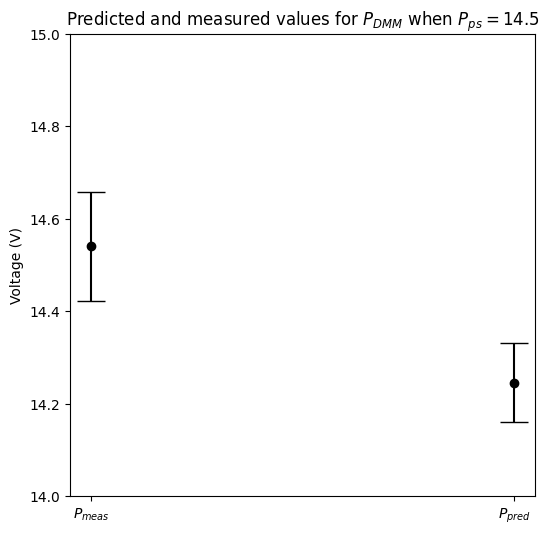

In [35]:
plt.figure(figsize = (6,6))

plt.errorbar(x=['$P_{meas}$', '$P_{pred}$'], y = [P_DMM_14_5, P_14_5], yerr = [dP_DMM_14_5, dP_14_5], marker = 'o', color = 'k', capsize = 10, linestyle = '')
plt.ylabel('Voltage (V)')
plt.ylim(14, 15)
plt.title('Predicted and measured values for $P_{DMM}$ when $P_{ps} = 14.5$')
plt.show()

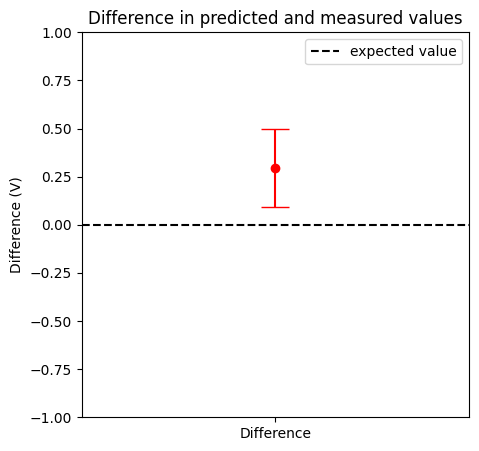

In [34]:
plt.figure(figsize = (5,5))
plt.errorbar(x = ['Difference'], y = Diff, yerr = dDiff, marker = 'o', color = 'r', capsize = 10, linestyle = '')
plt.axhline(color = 'k', linestyle = '--', label = 'expected value')
plt.ylabel('Difference (V)')
plt.ylim(-1, 1)
plt.title('Difference in predicted and measured values')
plt.legend()
plt.show()

The difference in the predicted and experimental values is greater than the uncertainty of the values, so the prediction is not compatible with the measured value, although it is close